# Análisis del Mercado de Drones

Este notebook analiza el mercado global de drones con datos recientes de cuota de mercado, ingresos de fabricantes, sectores de aplicación, crecimiento de operadores registrados, y drones de pasajeros.

---

**<h2>Indice</h2>**
<h3> 1. Cuota de Mercado de Drones <br>
2. Grafico de barras para los ingresos anuales de 2020 y 2021 <br>
3. Mapa de Operadores Registrados en 2023 <br>
4. Cálculo de Capitalización de Mercado para EHang y Joby Aviation <br>
5. Visualización de Precio y Capitalización de Mercado para EHang y Joby Aviation <br>
6. Visualización de la Inversión en Joby Aviation y sus Principales Inversores <br>
7. Mapa y Tabla de Vuelos de Prueba: Joby Aviation y EHang </h3>

## Configuración del Entorno

Antes de ejecutar el notebook, asegúrate de que las bibliotecas necesarias estén instaladas. Ejecuta la siguiente celda para instalar `pandas` y `matplotlib`, entre otras que se utilizarán más adelante.


In [1]:
# Instalar bibliotecas necesarias
%pip install pandas matplotlib geopandas notebook scikit-learn numpy tabulate --quiet


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip




## 1. Cuota de Mercado de Drones

En 2023, **DJI** domina el mercado global con una participación del 74.3%, seguido de **Parrot** (4.6%), **Yuneec** (3.3%) y otros fabricantes con cuotas más pequeñas. Esto refleja el liderazgo continuo de DJI en la industria, gracias a su innovación tecnológica y amplia gama de productos.

### **Datos de la Cuota de Mercado**
Los datos se extraen de un archivo CSV que contiene la distribución de la cuota de mercado por fabricante.


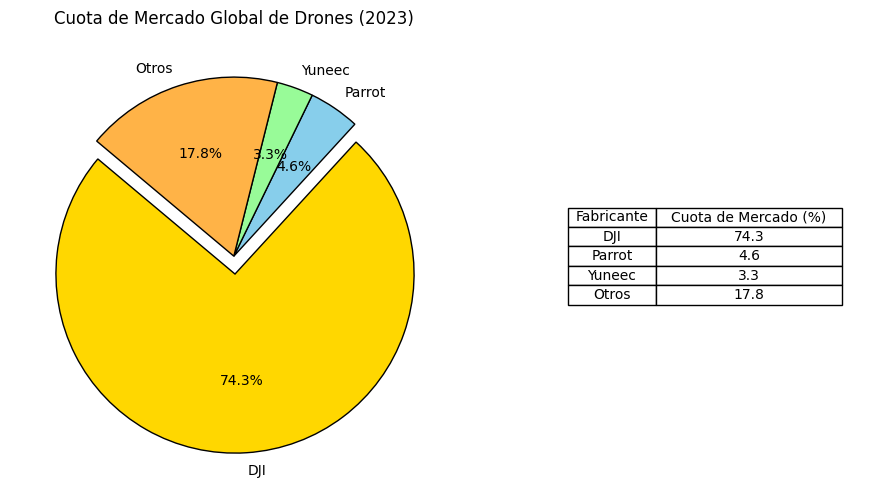

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Leer datos desde el archivo CSV
csv_path = "market_share_drones.csv"
market_share_df = pd.read_csv(csv_path)

# Configurar figura con dos paneles: gráfico y tabla
fig = plt.figure(figsize=(10, 5))
gs = GridSpec(1, 2, width_ratios=[2, 1])  # Configurar proporciones entre gráfico y tabla

# Gráfico de pastel
ax1 = fig.add_subplot(gs[0])
explode = [0.1 if fabricante == "DJI" else 0 for fabricante in market_share_df["Fabricante"]]  # Resaltar DJI
colors = ['#FFD700', '#87CEEB', '#98FB98', '#FFB347', '#FF6347', '#D3D3D3']  # Paleta personalizada

wedges, texts, autotexts = ax1.pie(
    market_share_df["Cuota de Mercado (%)"],
    labels=market_share_df["Fabricante"],
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    colors=colors,
    shadow=False,  # Sin sombra para diseño más plano
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},  # Bordes definidos
    textprops={'fontsize': 10}  # Texto sin negrita
)
ax1.set_title("Cuota de Mercado Global de Drones (2023)", fontsize=12)

# Tabla con los datos
ax2 = fig.add_subplot(gs[1])
ax2.axis("off")  # Apagar ejes para la tabla
table = ax2.table(
    cellText=market_share_df.values,
    colLabels=market_share_df.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(market_share_df.columns))))

# Ajustar el diseño
plt.tight_layout()
plt.show()

## 2. Grafico de barras para los ingresos anuales de 2020 y 2021
de `DJI` ,`Parrot`, `Yunnec`

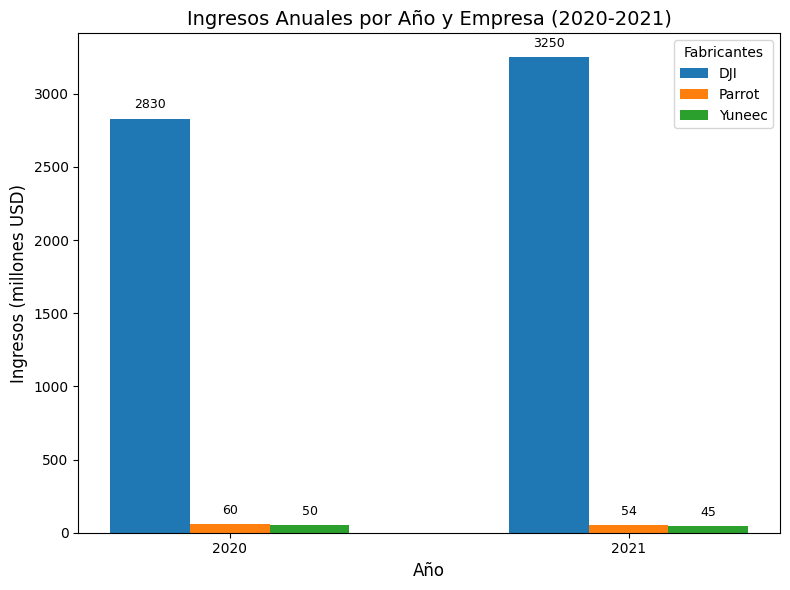

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Leer datos de ingresos anuales
revenues_path = "annual_revenues.csv"
revenues_df = pd.read_csv(revenues_path)

# Datos de ingresos anuales
fabricantes = revenues_df["Fabricante"]
ingresos_2020 = revenues_df["2020 (millones USD)"]
ingresos_2021 = revenues_df["2021 (millones USD)"]

# Configuración del gráfico
x = np.arange(2)  # Grupos para 2020 y 2021
width = 0.2  # Ancho de las barras
offset = [-width, 0, width]  # Desplazamiento de barras dentro de cada grupo

fig, ax = plt.subplots(figsize=(8, 6))

# Crear barras para cada empresa dentro de los años 2020 y 2021
for i, fabricante in enumerate(fabricantes):
    ax.bar(x + offset[i], [ingresos_2020[i], ingresos_2021[i]], width, label=fabricante)

# Añadir etiquetas y formato
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Ingresos (millones USD)', fontsize=12)
ax.set_title('Ingresos Anuales por Año y Empresa (2020-2021)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(['2020', '2021'], fontsize=10)
ax.legend(title="Fabricantes", fontsize=10)

# Añadir valores encima de las barras
for i, fabricante in enumerate(fabricantes):
    for j in range(2):  # Iterar sobre los años
        ax.text(
            x[j] + offset[i],
            [ingresos_2020[i], ingresos_2021[i]][j] + 50,  # Altura del texto
            f"{[ingresos_2020[i], ingresos_2021[i]][j]}",
            ha='center', va='bottom', fontsize=9
        )

# Ajustar diseño
plt.tight_layout()
plt.show()


# 3. Mapa de Operadores Registrados en 2023

Este código utiliza datos geográficos (shapefile) y un archivo de datos para visualizar la cantidad de operadores registrados en diferentes países en el año 2023. 

### **Fuentes de Datos**
**Shapefile del Mundo**: Contiene las fronteras de todos los países. El archivo está ubicado en:
   - `ne_110m_admin_0_countries.shp`.
**Datos CSV**: Información sobre el número de operadores registrados por país en 2023:
   - Países incluidos: Estados Unidos, España, Reino Unido, y China.
   - Números de operadores:
     - Estados Unidos: 785,827
     - España: 94,033
     - Reino Unido: 300,000
     - China: 1,270,000

C:\Users\Santiago\AppData\Local\Temp\ipykernel_4604\885851082.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(world_data.geometry.centroid.x, world_data.geometry.centroid.y, world_data['Operators_2023']):


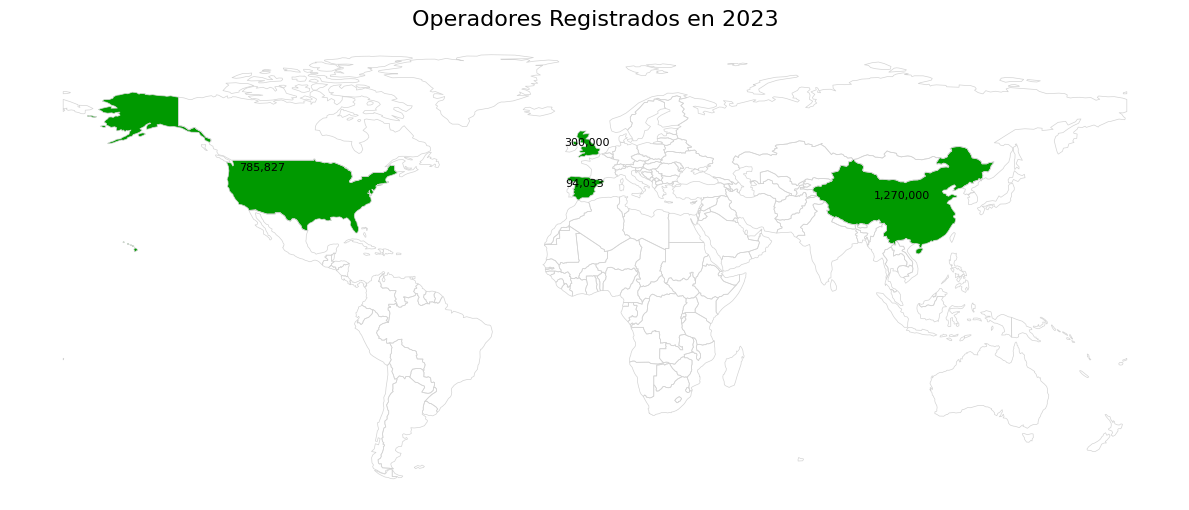

In [4]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Ruta relativa al archivo shapefile y CSV
shapefile_path = "ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"
csv_path = "operator_registrated.csv"

# Cargar el shapefile
world = gpd.read_file(shapefile_path)

# Filtrar para eliminar el Polo Sur (Antártida)
world = world[world['NAME'] != 'Antarctica']

# Cargar datos
data = {
    "Country": ["United States of America", "Spain", "United Kingdom", "China"],
    "Operators_2023": [785827, 94033, 300000, 1270000]
}

# Crear un DataFrame de geopandas con los datos
data_df = gpd.GeoDataFrame(data)

# Combinar los datos con el shapefile mundial
world_data = world.merge(data_df, left_on="NAME", right_on="Country", how="left")

# Crear un rango de colores personalizados (verde oscuro a verde más claro)
colors = ["#009900", "#009900", "#009900"]
custom_cmap = LinearSegmentedColormap.from_list("custom_green", colors)

# Crear el mapa único coloreando de verde los países con datos
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
world.boundary.plot(ax=ax, color="lightgray", linewidth=0.5)  # Límites de los países
world_data.plot(column='Operators_2023', ax=ax, cmap=custom_cmap, legend=False)

# Añadir títulos y eliminar ejes
ax.set_title("Operadores Registrados en 2023", fontsize=16)
ax.set_axis_off()

# Añadir etiquetas para los países con datos
for x, y, label in zip(world_data.geometry.centroid.x, world_data.geometry.centroid.y, world_data['Operators_2023']):
    if not pd.isna(label):
        plt.text(x, y, f"{int(label):,}", fontsize=8, ha='center', color='black')

plt.tight_layout()
plt.show()


## 4. Cálculo de Capitalización de Mercado para EHang y Joby Aviation

En esta sección, calcularemos la capitalización de mercado de las empresas **EHang** y **Joby Aviation** utilizando los datos históricos almacenados en los archivos `Yahoo_ehang.csv` y `Yahoo_joby.csv`.

### **¿Qué es la Capitalización de Mercado?**
La **capitalización de mercado** representa el valor total de mercado de una empresa y se calcula utilizando la fórmula:

$$
\text{Capitalización de Mercado} = \text{Precio de Cierre} \times \text{Número Total de Acciones en Circulación}
$$
---

In [ ]:
# Importar la librería pandas
import pandas as pd

# Cargar los datos desde los archivos CSV
ehang_df = pd.read_csv('Yahoo_Ehang.csv')
joby_df = pd.read_csv('Yahoo_Joby.csv')

# Filtrar solo las columnas necesarias
ehang_cleaned = ehang_df[['Date', 'Close']].copy()
joby_cleaned = joby_df[['Date', 'Close']].copy()

# Verificar las tablas limpiadas
print("### Datos Limpiados de EHang")
print(ehang_cleaned.to_markdown(index=False))  # Formato Markdown para una mejor visualización

print("\n### Datos Limpiados de Joby Aviation")
print(joby_cleaned.to_markdown(index=False))  # Formato Markdown para una mejor visualización

# Exportar los datos limpiados a nuevos archivos CSV para usarlos después
ehang_cleaned.to_csv('Yahoo_Ehang_Cleaned.csv', index=False)
joby_cleaned.to_csv('Yahoo_Joby_Cleaned.csv', index=False)


### Datos Limpiados de EHang
| Date       |   Close |
|:-----------|--------:|
| 2024-10-01 |   17.03 |
| 2024-09-01 |   14.14 |
| 2024-08-01 |   14.56 |
| 2024-07-01 |   12.76 |
| 2024-06-01 |   13.58 |
| 2024-05-01 |   16.97 |
| 2024-04-01 |   17.82 |
| 2024-03-01 |   20.57 |
| 2024-02-01 |   10.79 |
| 2024-01-01 |   10.16 |

### Datos Limpiados de Joby Aviation
| Date       |   Close |
|:-----------|--------:|
| 2024-10-01 |    4.8  |
| 2024-09-01 |    5.03 |
| 2024-08-01 |    5    |
| 2024-07-01 |    5.98 |
| 2024-06-01 |    5.1  |
| 2024-05-01 |    4.87 |
| 2024-04-01 |    5.05 |
| 2024-03-01 |    5.36 |
| 2024-02-01 |    5.62 |
| 2024-01-01 |    5.46 |


### **Acciones en circulación**
1. **EHang**: 58.62 millones de acciones en circulación.
2. **Joby Aviation**: 62.5 millones de acciones en circulación.

In [ ]:
# Importar pandas
import pandas as pd

# Cargar los datos limpios desde los archivos CSV
ehang_cleaned = pd.read_csv('Yahoo_Ehang_Cleaned.csv')
joby_cleaned = pd.read_csv('Yahoo_Joby_Cleaned.csv')

# Número de acciones en circulación (en millones)
ehang_shares_outstanding = 58.62 * 1e6  # EHang: 58.62 millones de acciones
joby_shares_outstanding = 620.43 * 1e6  # Joby: 620.43 millones de acciones

# Calcular la capitalización de mercado
ehang_cleaned['Market_Cap'] = ehang_cleaned['Close'] * ehang_shares_outstanding
joby_cleaned['Market_Cap'] = joby_cleaned['Close'] * joby_shares_outstanding

# Convertir la capitalización a millones de USD para facilitar la lectura
ehang_cleaned['Market_Cap_Millions'] = ehang_cleaned['Market_Cap'] / 1e6
joby_cleaned['Market_Cap_Millions'] = joby_cleaned['Market_Cap'] / 1e6

# Seleccionar columnas relevantes
ehang_cleaned['Company'] = 'EHang'
joby_cleaned['Company'] = 'Joby Aviation'

ehang_final = ehang_cleaned[['Date', 'Close', 'Market_Cap_Millions', 'Company']]
joby_final = joby_cleaned[['Date', 'Close', 'Market_Cap_Millions', 'Company']]

# Fusionar ambas tablas en una sola
combined_df = pd.concat([ehang_final, joby_final]).sort_values(by='Date').reset_index(drop=True)

# Renombrar columnas para mayor claridad
combined_df = combined_df.rename(columns={
    'Date': 'Fecha',
    'Close': 'Precio Cierre',
    'Market_Cap_Millions': 'Capitalización (Millones USD)',
    'Company': 'Empresa'
})

# Imprimir la tabla combinada
print("### Tabla Combinada de Capitalización de Mercado y Precio Cierre")
print(combined_df.to_markdown(index=False))

# Exportar la tabla combinada a un archivo CSV
combined_df.to_csv('Combined_Market_Cap.csv', index=False)


### Tabla Combinada de Capitalización de Mercado y Precio Cierre
| Fecha      |   Precio Cierre |   Capitalización (Millones USD) | Empresa       |
|:-----------|----------------:|--------------------------------:|:--------------|
| 2024-01-01 |           10.16 |                         595.579 | EHang         |
| 2024-01-01 |            5.46 |                        3387.55  | Joby Aviation |
| 2024-02-01 |           10.79 |                         632.51  | EHang         |
| 2024-02-01 |            5.62 |                        3486.82  | Joby Aviation |
| 2024-03-01 |           20.57 |                        1205.81  | EHang         |
| 2024-03-01 |            5.36 |                        3325.5   | Joby Aviation |
| 2024-04-01 |           17.82 |                        1044.61  | EHang         |
| 2024-04-01 |            5.05 |                        3133.17  | Joby Aviation |
| 2024-05-01 |           16.97 |                         994.781 | EHang         |
| 2024-05-01 |        

# 5. Visualización de Precio y Capitalización de Mercado para EHang y Joby Aviation

Este código genera gráficos para analizar la evolución del precio de cierre y la capitalización de mercado de las empresas **EHang** y **Joby Aviation** utilizando datos almacenados en un archivo CSV.

### **Datos Utilizados**
1. **Archivo CSV**: `Combined_Market_Cap.csv`
   - Contiene columnas:
     - `Fecha`: Fechas de los datos.
     - `Empresa`: Nombre de la empresa (EHang o Joby Aviation).
     - `Precio Cierre`: Precio de cierre de la acción en USD.
     - `Capitalización (Millones USD)`: Capitalización de mercado calculada en millones de USD.

### **Conclusión**
Estos gráficos permiten comparar de forma visual el desempeño financiero de las dos empresas en términos de:
- Variación del precio de sus acciones.
- Crecimiento o declive en su capitalización de mercado a lo largo del tiempo.

El análisis puede ser útil para inversores interesados en las tendencias del sector.


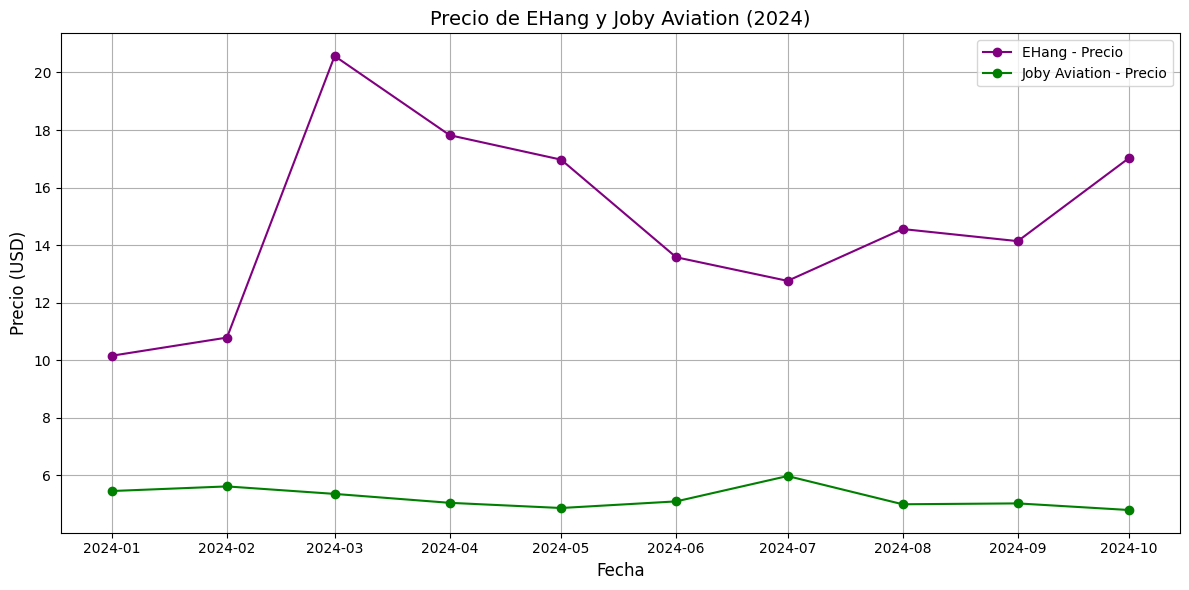

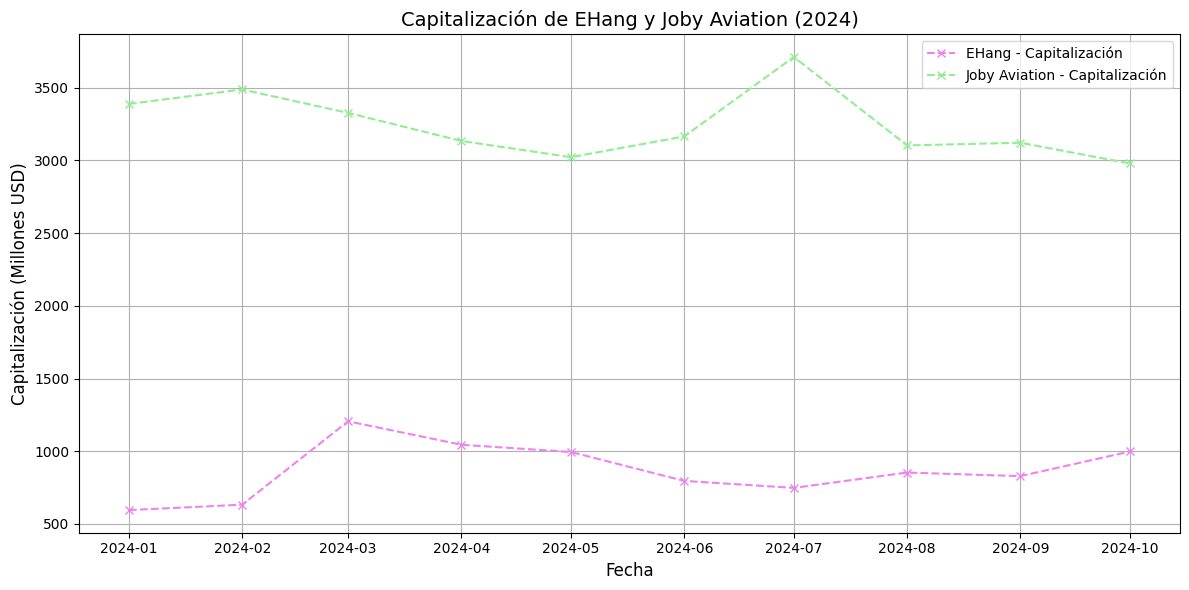

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv("Combined_Market_Cap.csv")
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Filtrar datos por empresa
ehang = df[df['Empresa'] == 'EHang']
joby = df[df['Empresa'] == 'Joby Aviation']

# Gráfico 1: Precio de las dos empresas
plt.figure(figsize=(12, 6))
plt.plot(ehang['Fecha'], ehang['Precio Cierre'], label="EHang - Precio", color='purple', linestyle='-', marker='o')
plt.plot(joby['Fecha'], joby['Precio Cierre'], label="Joby Aviation - Precio", color='green', linestyle='-', marker='o')

plt.title("Precio de EHang y Joby Aviation (2024)", fontsize=14)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Precio (USD)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico 2: Capitalización de las dos empresas
plt.figure(figsize=(12, 6))
plt.plot(ehang['Fecha'], ehang['Capitalización (Millones USD)'], label="EHang - Capitalización", color='violet', linestyle='--', marker='x')
plt.plot(joby['Fecha'], joby['Capitalización (Millones USD)'], label="Joby Aviation - Capitalización", color='lightgreen', linestyle='--', marker='x')

plt.title("Capitalización de EHang y Joby Aviation (2024)", fontsize=14)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Capitalización (Millones USD)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 6. Visualización de la Inversión en Joby Aviation y sus Principales Inversores

Este código genera un gráfico que representa la capitalización bursátil de **Joby Aviation** como un círculo central y muestra a sus principales inversores como círculos periféricos conectados al núcleo.

### **Datos Utilizados**
1. **Capitalización Bursátil de Joby Aviation**: 
   - **4,840 millones USD** (representado en el círculo central).
2. **Inversores Principales**:
   - Incluye los nombres y montos invertidos en millones de USD:
     - **Toyota**: 900M
     - **Baillie Gifford**: 265.34M
     - **BlackRock**: 206.75M
     - **Vanguard**: 185.78M
     - **Wellington**: 150M
     - **JP Morgan**: 120M


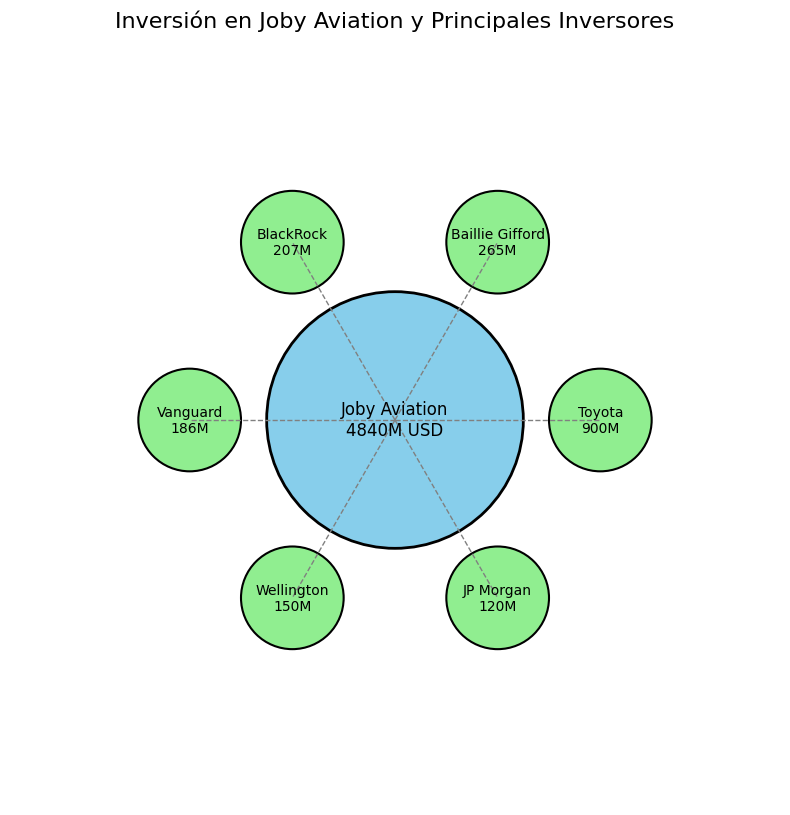

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de los inversores
data = {
    "Inversor": ["Toyota", "Baillie Gifford", "BlackRock", "Vanguard", "Wellington", "JP Morgan"],
    "Monto (Millones USD)": [900, 265.34, 206.75, 185.78, 150.00, 120.00]
}

# Datos del círculo principal
capitalizacion_bursatil = 4840  # Actualización de la capitalización bursátil en millones de USD
empresa = "Joby Aviation"

# Coordenadas para los círculos periféricos
num_inversores = len(data["Inversor"])
angles = np.linspace(0, 2 * np.pi, num_inversores, endpoint=False)
radius = 0.8  # Radio para posicionar los círculos periféricos

# Crear el gráfico
fig, ax = plt.subplots(figsize=(10, 10))

# Círculo principal
main_circle = plt.Circle((0, 0), 0.5, color="skyblue", ec="black", lw=2)
ax.add_artist(main_circle)
plt.text(0, 0, f"{empresa}\n{capitalizacion_bursatil}M USD", fontsize=12, ha="center", va="center", color="black")

# Círculos periféricos
for i, (inversor, monto) in enumerate(zip(data["Inversor"], data["Monto (Millones USD)"])):
    x = radius * np.cos(angles[i])
    y = radius * np.sin(angles[i])
    size = 0.2  # Tamaño fijo más pequeño para los círculos periféricos
    circle = plt.Circle((x, y), size, color="lightgreen", ec="black", lw=1.5)
    ax.add_artist(circle)
    
    # Línea que conecta al círculo central
    plt.plot([0, x], [0, y], color="gray", linestyle="--", lw=1)
    
    # Etiquetas
    plt.text(x, y, f"{inversor}\n{monto:.0f}M", fontsize=10, ha="center", va="center")

# Configuración del gráfico
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect("equal")
ax.axis("off")
plt.title("Inversión en Joby Aviation y Principales Inversores", fontsize=16)

plt.show()


# 7. Mapa y Tabla de Vuelos de Prueba: Joby Aviation y EHang

Este código crea una visualización combinada que incluye un mapa geográfico y una tabla de datos para mostrar la distribución de vuelos de prueba realizados por **Joby Aviation** y **EHang** en distintos países.

### **Datos Utilizados**
1. **Shapefile**:
   - Archivo geográfico `ne_110m_admin_0_countries.shp` que define las fronteras de los países del mundo.
   - Convertido a la proyección Web Mercator (EPSG:3857) para mayor precisión.

2. **Vuelos de Prueba por País**:
   - Información contenida en un DataFrame:
     - Países: Estados Unidos, Japón, China, España, entre otros.
     - Vuelos realizados por:
       - **Joby Aviation**: Hasta 100 vuelos (principalmente en EE.UU.).
       - **EHang**: Hasta 1,000 vuelos (principalmente en China).
   - Se corrigieron los nombres de los países para que coincidan con el shapefile.
   
### **Propósito**
- Analizar y comparar la distribución geográfica de los vuelos de prueba de ambas empresas.
- Identificar regiones donde ambas empresas tienen actividad simultáneamente.

### **Conclusión**
Esta visualización permite comprender de manera efectiva la presencia global de **Joby Aviation** y **EHang**, destacando sus áreas de operación más importantes y cualquier superposición geográfica entre las dos empresas.


C:\Users\Santiago\AppData\Local\Temp\ipykernel_35872\1634362013.py:56: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax[0].legend()
C:\Users\Santiago\AppData\Local\Temp\ipykernel_35872\1634362013.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()


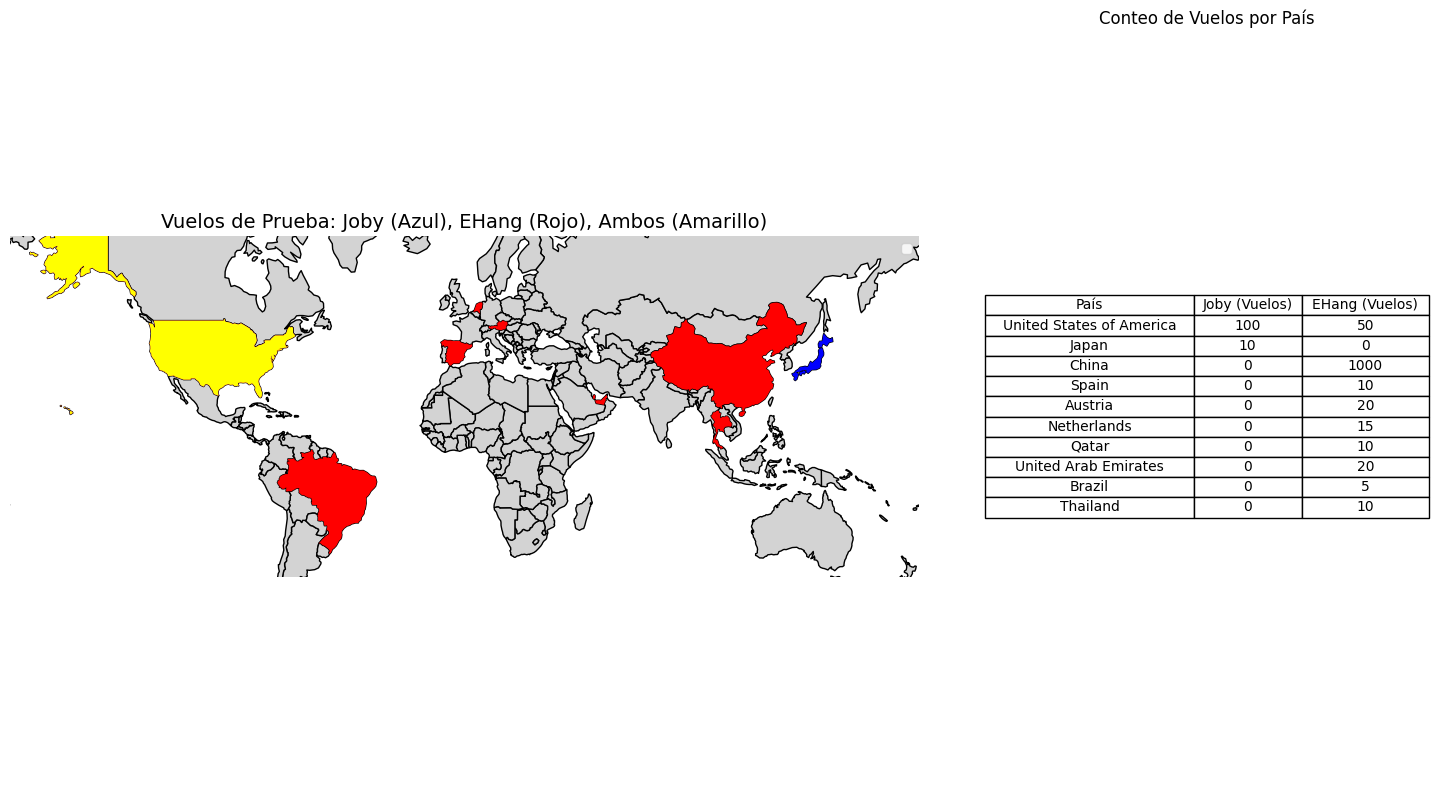

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Ruta al archivo shapefile
shapefile_path = "ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"

# Cargar el shapefile
world = gpd.read_file(shapefile_path)

# Convertir a CRS proyectado para evitar errores geométricos
world = world.to_crs(epsg=3857)  # Web Mercator Projection

# Datos de vuelos por empresa y país
data = {
    "País": ["Estados Unidos", "Japón", "China", "España", "Austria", "Países Bajos", "Qatar", "Emiratos Árabes Unidos", "Brasil", "Tailandia"],
    "Joby (Vuelos)": [100, 10, 0, 0, 0, 0, 0, 0, 0, 0],
    "EHang (Vuelos)": [50, 0, 1000, 10, 20, 15, 10, 20, 5, 10]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Corregir nombres de países para que coincidan con los del shapefile
country_mapping = {
    "Estados Unidos": "United States of America",
    "Japón": "Japan",
    "China": "China",
    "España": "Spain",
    "Austria": "Austria",
    "Países Bajos": "Netherlands",
    "Qatar": "Qatar",
    "Emiratos Árabes Unidos": "United Arab Emirates",
    "Brasil": "Brazil",
    "Tailandia": "Thailand"
}
df["País"] = df["País"].replace(country_mapping)

# Agregar datos al shapefile
world["Joby"] = world["NAME"].map(df.set_index("País")["Joby (Vuelos)"]).fillna(0)
world["EHang"] = world["NAME"].map(df.set_index("País")["EHang (Vuelos)"]).fillna(0)
world["Ambos"] = (world["Joby"] > 0) & (world["EHang"] > 0)

# Crear figura
fig, ax = plt.subplots(1, 2, figsize=(15, 8), gridspec_kw={'width_ratios': [2, 1]})

# Colorear el mapa
world.plot(ax=ax[0], color="lightgray", edgecolor="black")  # Fondo
world[world["Joby"] > 0].plot(ax=ax[0], color="blue", label="Joby Aviation")
world[world["EHang"] > 0].plot(ax=ax[0], color="red", label="EHang")
world[world["Ambos"]].plot(ax=ax[0], color="yellow", label="Ambos")

# Configuración del mapa
ax[0].set_title("Vuelos de Prueba: Joby (Azul), EHang (Rojo), Ambos (Amarillo)", fontsize=14)
ax[0].axis("off")
ax[0].legend()

# Limitar visualización para no mostrar el Polo Sur
xmin, ymin, xmax, ymax = (-20000000, -5000000, 20000000, 10000000)  # Coordenadas aproximadas
ax[0].set_xlim(xmin, xmax)
ax[0].set_ylim(ymin, ymax)

# Mostrar tabla a la derecha
ax[1].axis("off")
tabla = ax[1].table(cellText=df.values, colLabels=df.columns, loc="center", cellLoc="center")
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.auto_set_column_width(col=list(range(len(df.columns))))

# Título de la tabla
ax[1].set_title("Conteo de Vuelos por País", fontsize=12)

# Mostrar gráfico
plt.tight_layout()
plt.show()
